In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [3]:
# 载入数据
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.data.shape#查看数据的维度

(569, 30)

In [6]:
# 分割训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=.2,random_state=10,stratify=cancer.target)

In [7]:
# 数据标注化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
# 训练集标准化
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [10]:
# 测试集标准化
X_test_scaled = scaler.transform(X_test)

# 建立SVM模型并查看模型效果

In [11]:
# 建立软间隔SVM模型
from sklearn.svm import LinearSVC

In [12]:
model_svm = LinearSVC(random_state=10)

In [13]:
model_svm.fit(X_train_scaled,y_train)

LinearSVC(random_state=10)

In [14]:
# 得到测试集预测标签
y_pred = model_svm.predict(X_test_scaled)

In [15]:
# 输出测试集预测正确率
model_svm.score(X_test_scaled,y_test)

0.956140350877193

In [16]:
# 绘制混淆矩阵
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

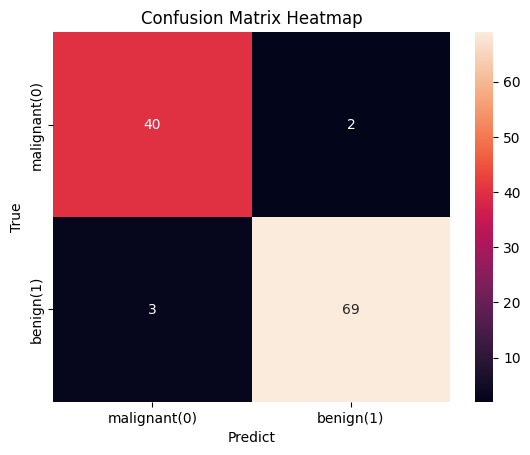

In [17]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',xticklabels=["malignant(0)","benign(1)"],yticklabels=["malignant(0)","benign(1)"])
ax.set_ylabel('True')
ax.set_xlabel('Predict')
ax.set_title("Confusion Matrix Heatmap")

## 利用PCA进行降维

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=15)# 降维为15

In [26]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [27]:
# 测试集降维
X_test_pca = pca.transform(X_test_scaled)

In [28]:
# 查看方差贡献率
sum(pca.explained_variance_ratio_)

0.9872954280920222

In [29]:
# 查看降维后的模型效果
# 再次建立软间隔SVM模型比较效果
model_svm.fit(X_train_pca,y_train)

LinearSVC(random_state=10)

In [30]:
# 得到测试集预测标签
y_pred_pca = model_svm.predict(X_test_pca)

In [31]:
# 输出测试集预测正确率
model_svm.score(X_test_pca,y_test)

0.9649122807017544

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

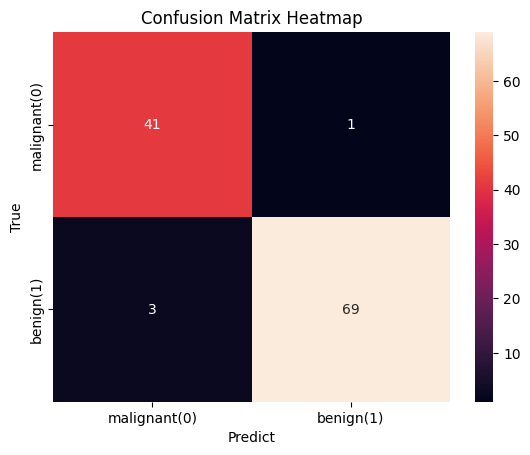

In [32]:
# 绘制混淆矩阵
ax = sns.heatmap(confusion_matrix(y_test,y_pred_pca),annot=True,fmt='d',xticklabels=["malignant(0)","benign(1)"],yticklabels=["malignant(0)","benign(1)"])
ax.set_ylabel('True')
ax.set_xlabel('Predict')
ax.set_title("Confusion Matrix Heatmap")

## 利用PCA将训练集降至3维进行可视化

In [33]:
# 降维
X_train_pca = PCA(n_components=2).fit_transform(X_train_scaled)

Text(0, 0.5, 'Second principal component')

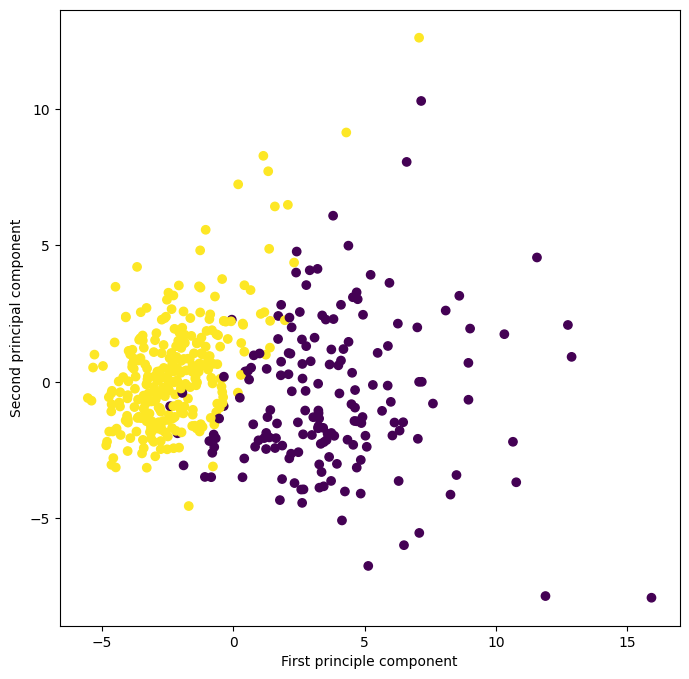

In [36]:
# 绘图
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)
plt.xlabel("First principle component")
plt.ylabel("Second principal component")

# 利用鸢尾花对数据集进行分类

In [37]:
# 载入数据集
from sklearn import datasets
iris = datasets.load_iris()

In [38]:
X = iris.data
y = iris.target

In [39]:
trarget_names = iris.target_names

In [40]:
# 划分训练集和测试集
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10,stratify=y)

In [41]:
# 训练模型并评估模型
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
Ida = LinearDiscriminantAnalysis(n_components=2)# 降维为2维

In [43]:
Ida.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [45]:
y_pred = Ida.predict(x_test)

In [46]:
Ida.score(x_test,y_test)

1.0

In [47]:
# 输出方差贡献率
sum(Ida.explained_variance_ratio_)

1.0

## 将PCA和LDA的降维结果进行可视化并进行对比

In [48]:
# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [49]:
# LDA 降维
X_Ida = Ida.fit(X_train,y_train).transform(X_train)

In [50]:
# 设定点的颜色
colors = ['navy','turquoise','darkorange']

Text(0.5, 1.0, 'PCA of IRIS dataset')

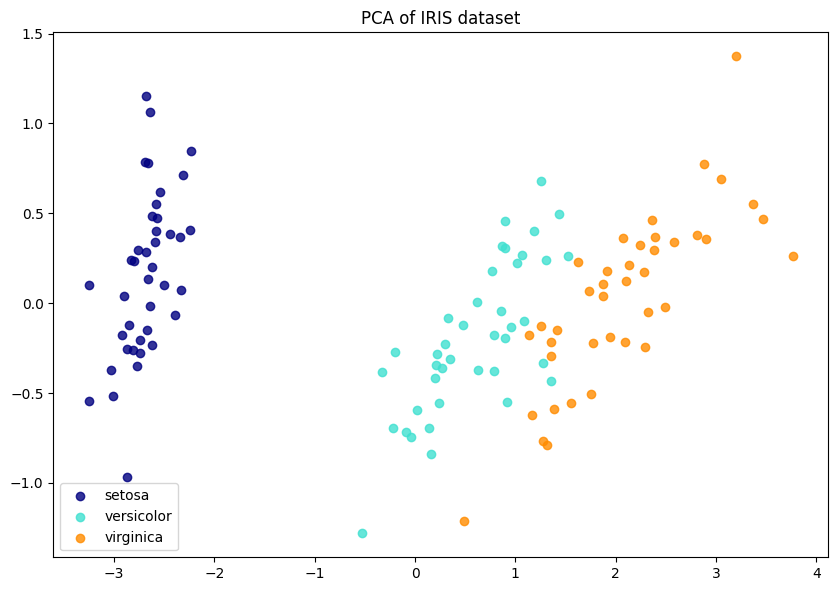

In [56]:
# 进行可视化
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
for color,i,target_name in zip(colors,[0,1,2],trarget_names):
    plt.scatter(X_pca[y_train == i,0],X_pca[y_train==i,1],color=color,alpha=.8,label=target_name)
plt.legend(loc = 'best',shadow=False,scatterpoints=1)
plt.title('PCA of IRIS dataset')

# 人脸数据集

In [57]:
# 载入数据
from sklearn.datasets import fetch_olivetti_faces

In [58]:
dataset = fetch_olivetti_faces(shuffle=True,random_state=10)
faces = dataset.data# 数据的下载出问题了

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\morang\scikit_learn_data


HTTPError: HTTP Error 403: Forbidden

In [ ]:
# 查看数据的维度
faces.shape

In [ ]:
# 展示数据
# 展示6张图片，按2行3列放置
n_row,n_col = 2,3

In [ ]:
# 人脸数据图片的显示大小
image_shape = (64,64)

In [ ]:
# 定义绘图函数
def plot_gallery(title,images,n_col=n_col,n_row=n_row):
    plt.figure(figsize=(10,8))
    plt.suptitle(title,size=15)
    for i,comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)
        
        # 以灰度图形显示
        plt.imshow(comp.reshape(image_shape),cmap=plt.cm.gray)
        
        # 不显示坐标轴刻度
        plt.xticks(())
        plt.yticks(())

In [ ]:
# 绘制展示数据
plot_gallery("Original Faces",faces[:6])

In [ ]:
# PCA 还原脸部图像
# PCA 降维
pca = PCA(n_components=6,whiten=True,random_state=10)
pca.fit(faces)
faces_pca = pca.components_

In [ ]:
# MMF 还原脸部图像
nmf = NMF(n_components=6,init="nndsda",random_state=10)
nmf.fit(faces)
faces_nmf = nmf.component_

# 还原图像
plot_gallery("NMF Faces",faces_nmf[:6])

# 构建三维S型曲线

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
%matplotlib inline

In [60]:
# 产生数据
n_points = 1000
X,color=datasets.make_s_curve(n_points,random_state=10)

Text(0.5, 0.92, 'S Curve')

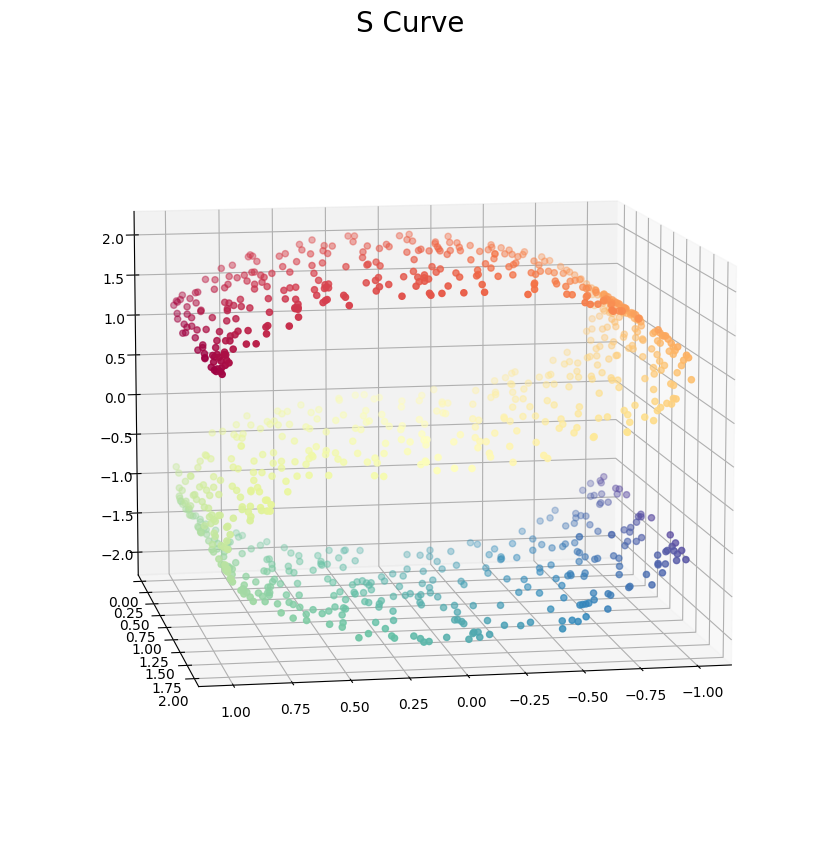

In [69]:
# 绘图
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig,elev=10,azim=80)
ax.scatter(X[:,0],X[:,1],X[:,2],c=color,cmap=plt.cm.Spectral)
ax.set_title('S Curve',fontsize=20)

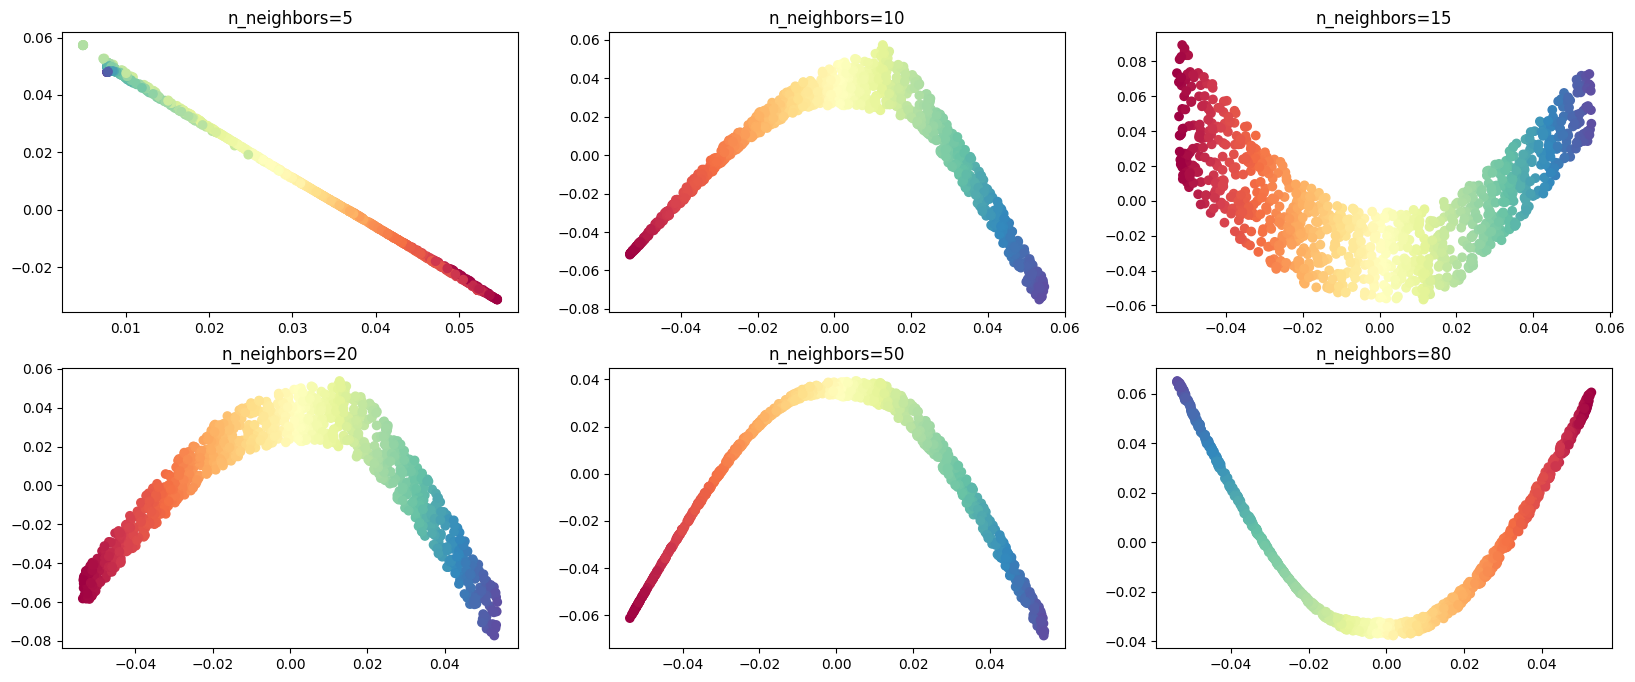

In [74]:
# 近邻数对降维结果的影响
from sklearn.manifold import LocallyLinearEmbedding

# 设置不同近邻数
n_neighbors = [5,10,15,20,50,80]
# 降维至2维
n_components=2
fig = plt.figure(figsize=(20,8))
for i,number in enumerate(n_neighbors):
    Y = LocallyLinearEmbedding(n_neighbors=number,n_components=n_components,random_state=10).fit_transform(X)
    # 绘图
    ax = fig.add_subplot(231+i)
    plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
    plt.title("n_neighbors=%s"%(number))

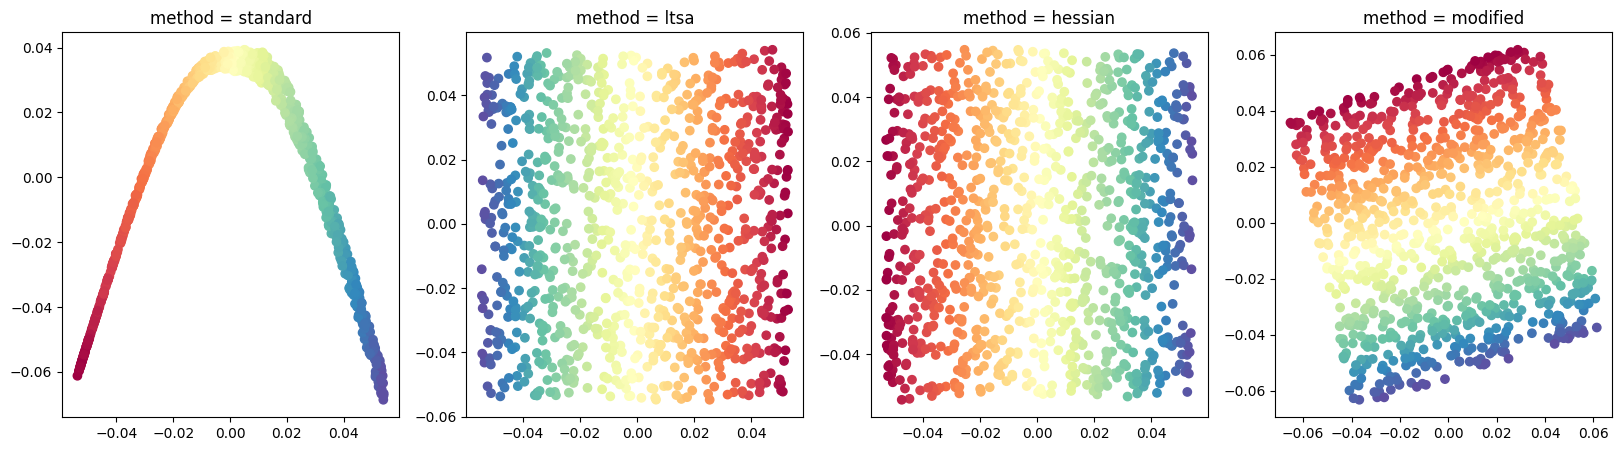

In [76]:
# 局部线性重构算法对降维结果的影响
methods = ['standard','ltsa','hessian','modified']

fig = plt.figure(figsize=(20,5))
for i,methods in enumerate(methods):
    # LLE 进行降维，临近数固定为50
    Y = LocallyLinearEmbedding(n_neighbors=50,n_components=n_components,method=methods,random_state=10).fit_transform(X)
    
    # 绘图
    ax = fig.add_subplot(141+i)
    plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
    plt.title("method = %s"%(methods))

# 利用MDS将三维S型曲线降至二维

Text(0.5, 1.0, 'MDS')

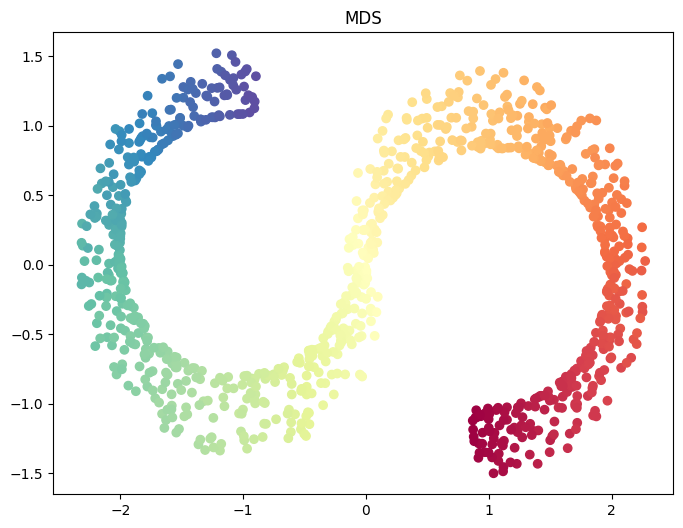

In [77]:
from sklearn.manifold import MDS
# 使用MDS降维并得到降维结果
mds = MDS(n_components,random_state=10)
Y = mds.fit_transform(X)

# 降维可视化
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
plt.title("MDS")

# 根据城市间距离还原城市坐标

## 构建距离矩阵

In [79]:
import pandas as pd

In [85]:
d = pd.DataFrame([[0,1064,1055,1187],[1064,0,1675,1717],[1055,1675,0,2192],[1187,1717,2192,0]],
                 columns=['北京','上海','哈尔滨','兰州'],
                 index=['北京','上海','哈尔滨','兰州'])

In [86]:
d

,北京,上海,哈尔滨,兰州
北京,0,1064,1055,1187
上海,1064,0,1675,1717
哈尔滨,1055,1675,0,2192
兰州,1187,1717,2192,0


## 根据城市距离还原城市坐标

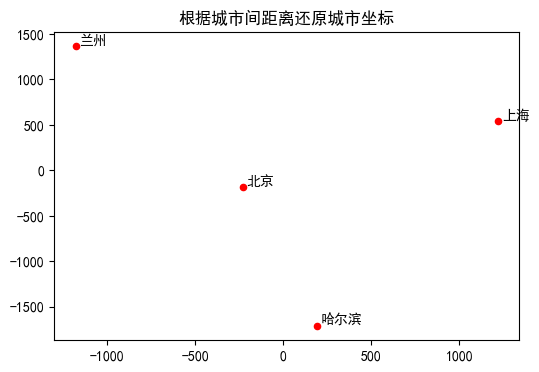

In [87]:
# plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
## 使用MDS降维并得到降维结果
mds = MDS(n_components,random_state=10)
Y = mds.fit_transform(d)
# 降维可视化
plt.figure(figsize=(6,4))
plt.scatter(Y[:,0],Y[:,1],c='red',s=20)
plt.title("根据城市间距离还原城市坐标")
for item,city in enumerate(d.columns):
    plt.text(Y[item,0]+20,Y[item,1]+20,city)

In [88]:
print(Y[item,0]+20)

-1160.9152177083208


# 利用t-SNE将三维S型曲线降维至二维

In [89]:
from sklearn.manifold import TSNE

Text(0.5, 1.0, 't_SNE')

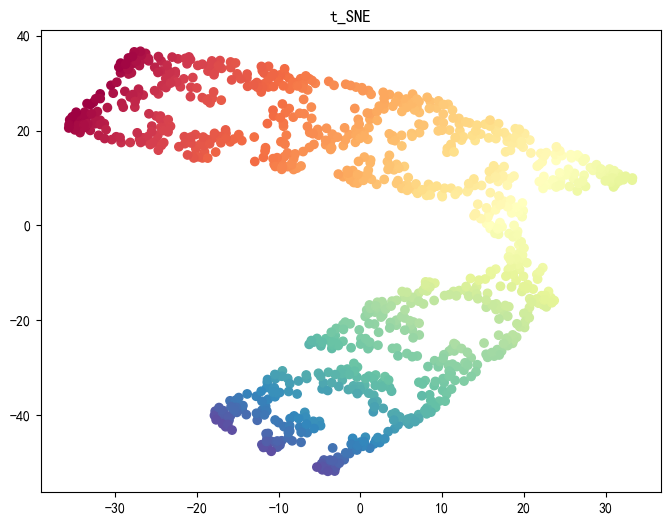

In [90]:
# 使用t-SNE降维并得到降维结果
tsne = TSNE(n_components,random_state=10)
Y = tsne.fit_transform(X)

# 降维可视化
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
plt.title("t_SNE")

## 困惑度对t-SNE 降维结果的影响

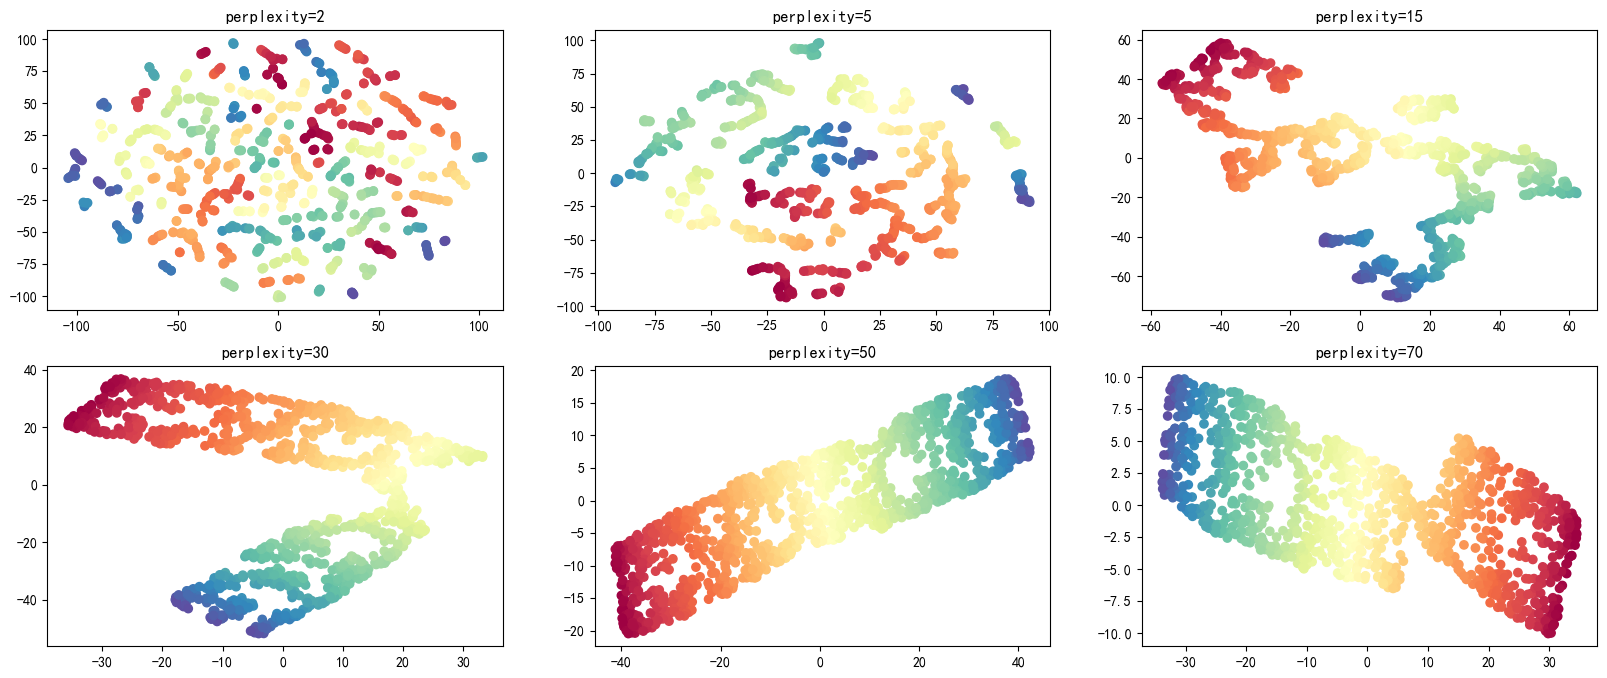

In [91]:
# 设置不同困惑度
perplexs = [2,5,15,30,50,70]
fig = plt.figure(figsize=(20,8))
for i,perplex in enumerate(perplexs):
    # t-SNE 进行降维
    Y = TSNE(n_components,perplexity=perplex,random_state=10).fit_transform(X)
    
    #绘图
    ax = fig.add_subplot(231+i)
    plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
    plt.title("perplexity=%s"%(perplex))

# 手写数字

In [92]:
# 载入数据
from sklearn.datasets import load_digits

In [93]:
##选择其中5类
digits = load_digits(n_class=5)
X = digits.data
y = digits.target

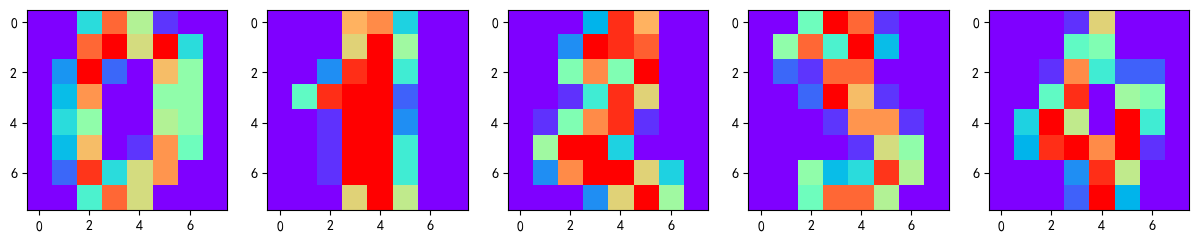

In [94]:
# 展示数据
fig = plt.figure(figsize=(15,8))
for item in range(5):
    ax = fig.add_subplot(151+item)
    plt.imshow(X[item,:].reshape(8,8),cmap=plt.cm.rainbow)

# 构建2D展示函数

In [95]:
import numpy as np

In [96]:
def plot_embedding_2d(X,title):
    # 数据归一化
    x_min,x_max = np.min(X,axis=0),np.max(X,axis=0)
    X = (X-x_min)/(x_max-x_min)
    
    # 绘制散点图
    fig  = plt.figure(figsize=(12,8))
    for i in range(X.shape[0]):
        plt.text(X[i][0],X[i][1],str(digits.target[i]),
                                    color=plt.cm.Set1(y[i],5.),
                                    fontdict={'size':9})
        
    # 添加标题
    plt.title(title)
        

## 利用t-SNE将手写数据识别数据集降维至二维

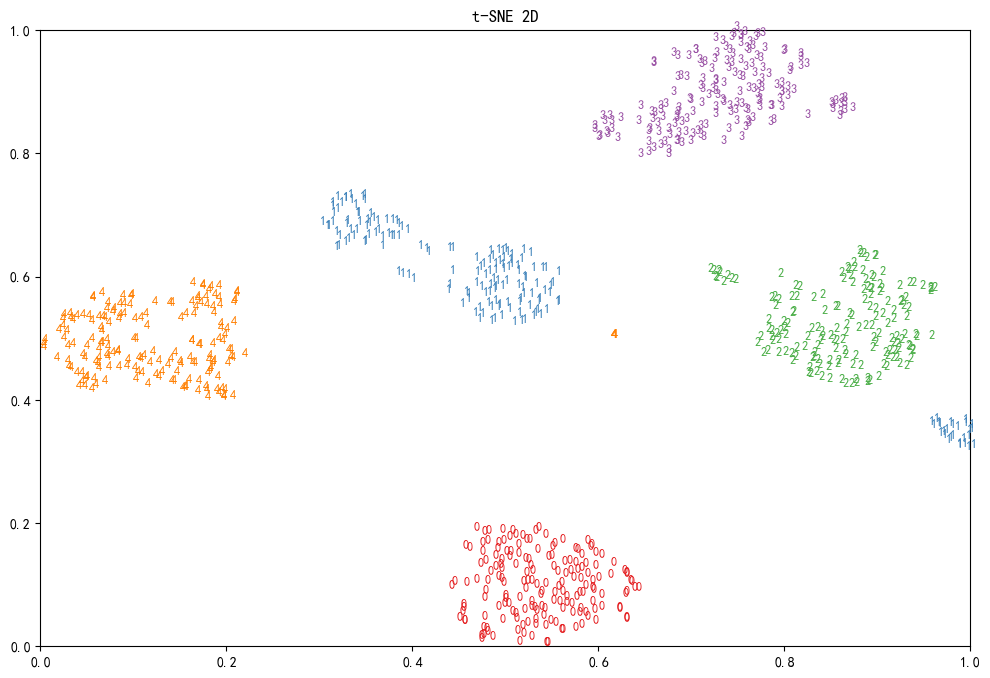

In [97]:
tsne = TSNE(n_components=2,random_state=10)
Y = tsne.fit_transform(X)
plot_embedding_2d(Y,"t-SNE 2D")

# 构建3D展示函数

In [99]:
def plot_embedding_3D(X,title):
    # 数据归一化
    x_min,x_max = np.min(X,axis=0),np.max(X,axis=0)
    X = (X-x_min)/(x_max-x_min)
    # 绘制散点图
    fig = plt.figure(figsize=(12,8))
    ax = Axes3D(fig,elev = 10,azim=60)
    for i in range(X.shape[0]):
        ax.text(X[i][0],X[i,1],X[i,2],str(digits.target[i]),
               color=plt.cm.Set1(y[i]/5.),
               fontdict={'size':9})
    # 添加标题
    plt.title(title)

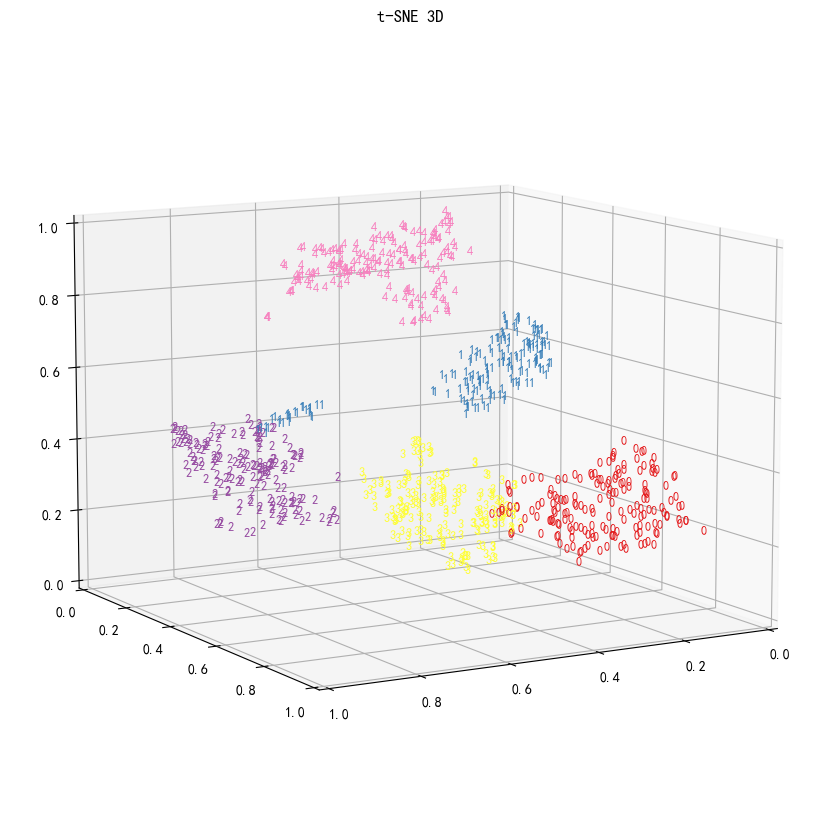

In [100]:
tsne = TSNE(n_components=3,random_state=10)
Y = tsne.fit_transform(X)
plot_embedding_3D(Y,"t-SNE 3D")